<a href="https://colab.research.google.com/github/Mike-Ziegler/MANE_4962_PROJECT_SPRING24/blob/main/Decision_Tree_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Decision Tree**

Accuracy: 0.7209406494960806


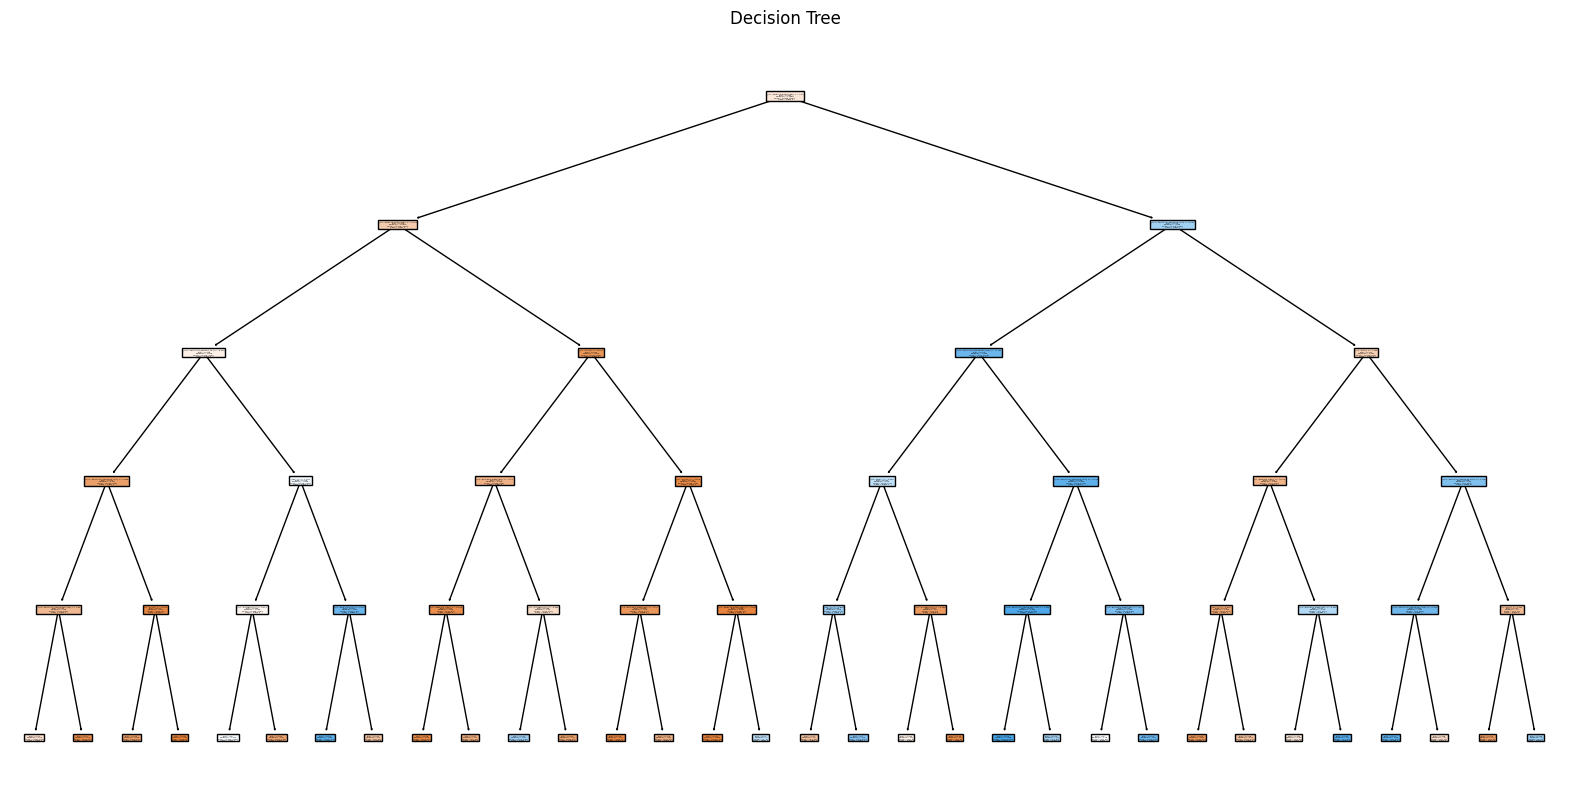

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

# Load the dataset
file_name = "CAE1_32_64_20_512_8_10_20.xlsx"
df = pd.read_excel(file_name, header=[0, 1])

# Separate features and labels
X = df.values[:, :-1]  # Features (remove the last column which is the class label)
y = df.values[:, -1]   # Class labels (last column)

# Shuffle the dataset
X, y = shuffle(X, y, random_state=42)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert labels to binary format
y_binary = (y - np.min(y)) / (np.max(y) - np.min(y))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
clf=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, min_samples_split=20, min_samples_leaf=5, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=100)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=df.columns[:-1], class_names=["Class 0", "Class 1"])
plt.title("Decision Tree")
plt.show()


**Decision Tree 72% accuracy with manual tuning**

**Visualizing the boundary**

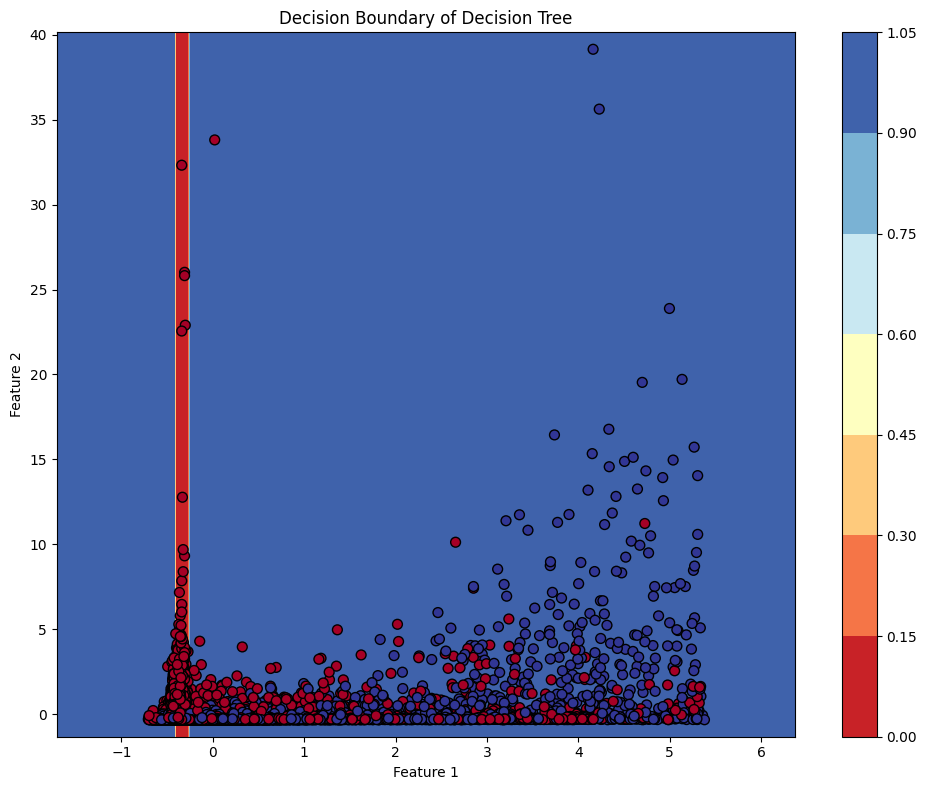

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Create a meshgrid for all 18 features
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Get all 18 features for the meshgrid
meshgrid_features = np.c_[xx.ravel(), yy.ravel()]
meshgrid_features = np.hstack((meshgrid_features, np.zeros((meshgrid_features.shape[0], 19))))

# Predict on the meshgrid
Z = clf.predict(meshgrid_features)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 8))
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

# Plot the data points
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_binary, cmap=plt.cm.RdYlBu, edgecolor='black', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of Decision Tree')
plt.colorbar(cs)
plt.tight_layout()
plt.show()


**Visualizing the Data with Seaborn**

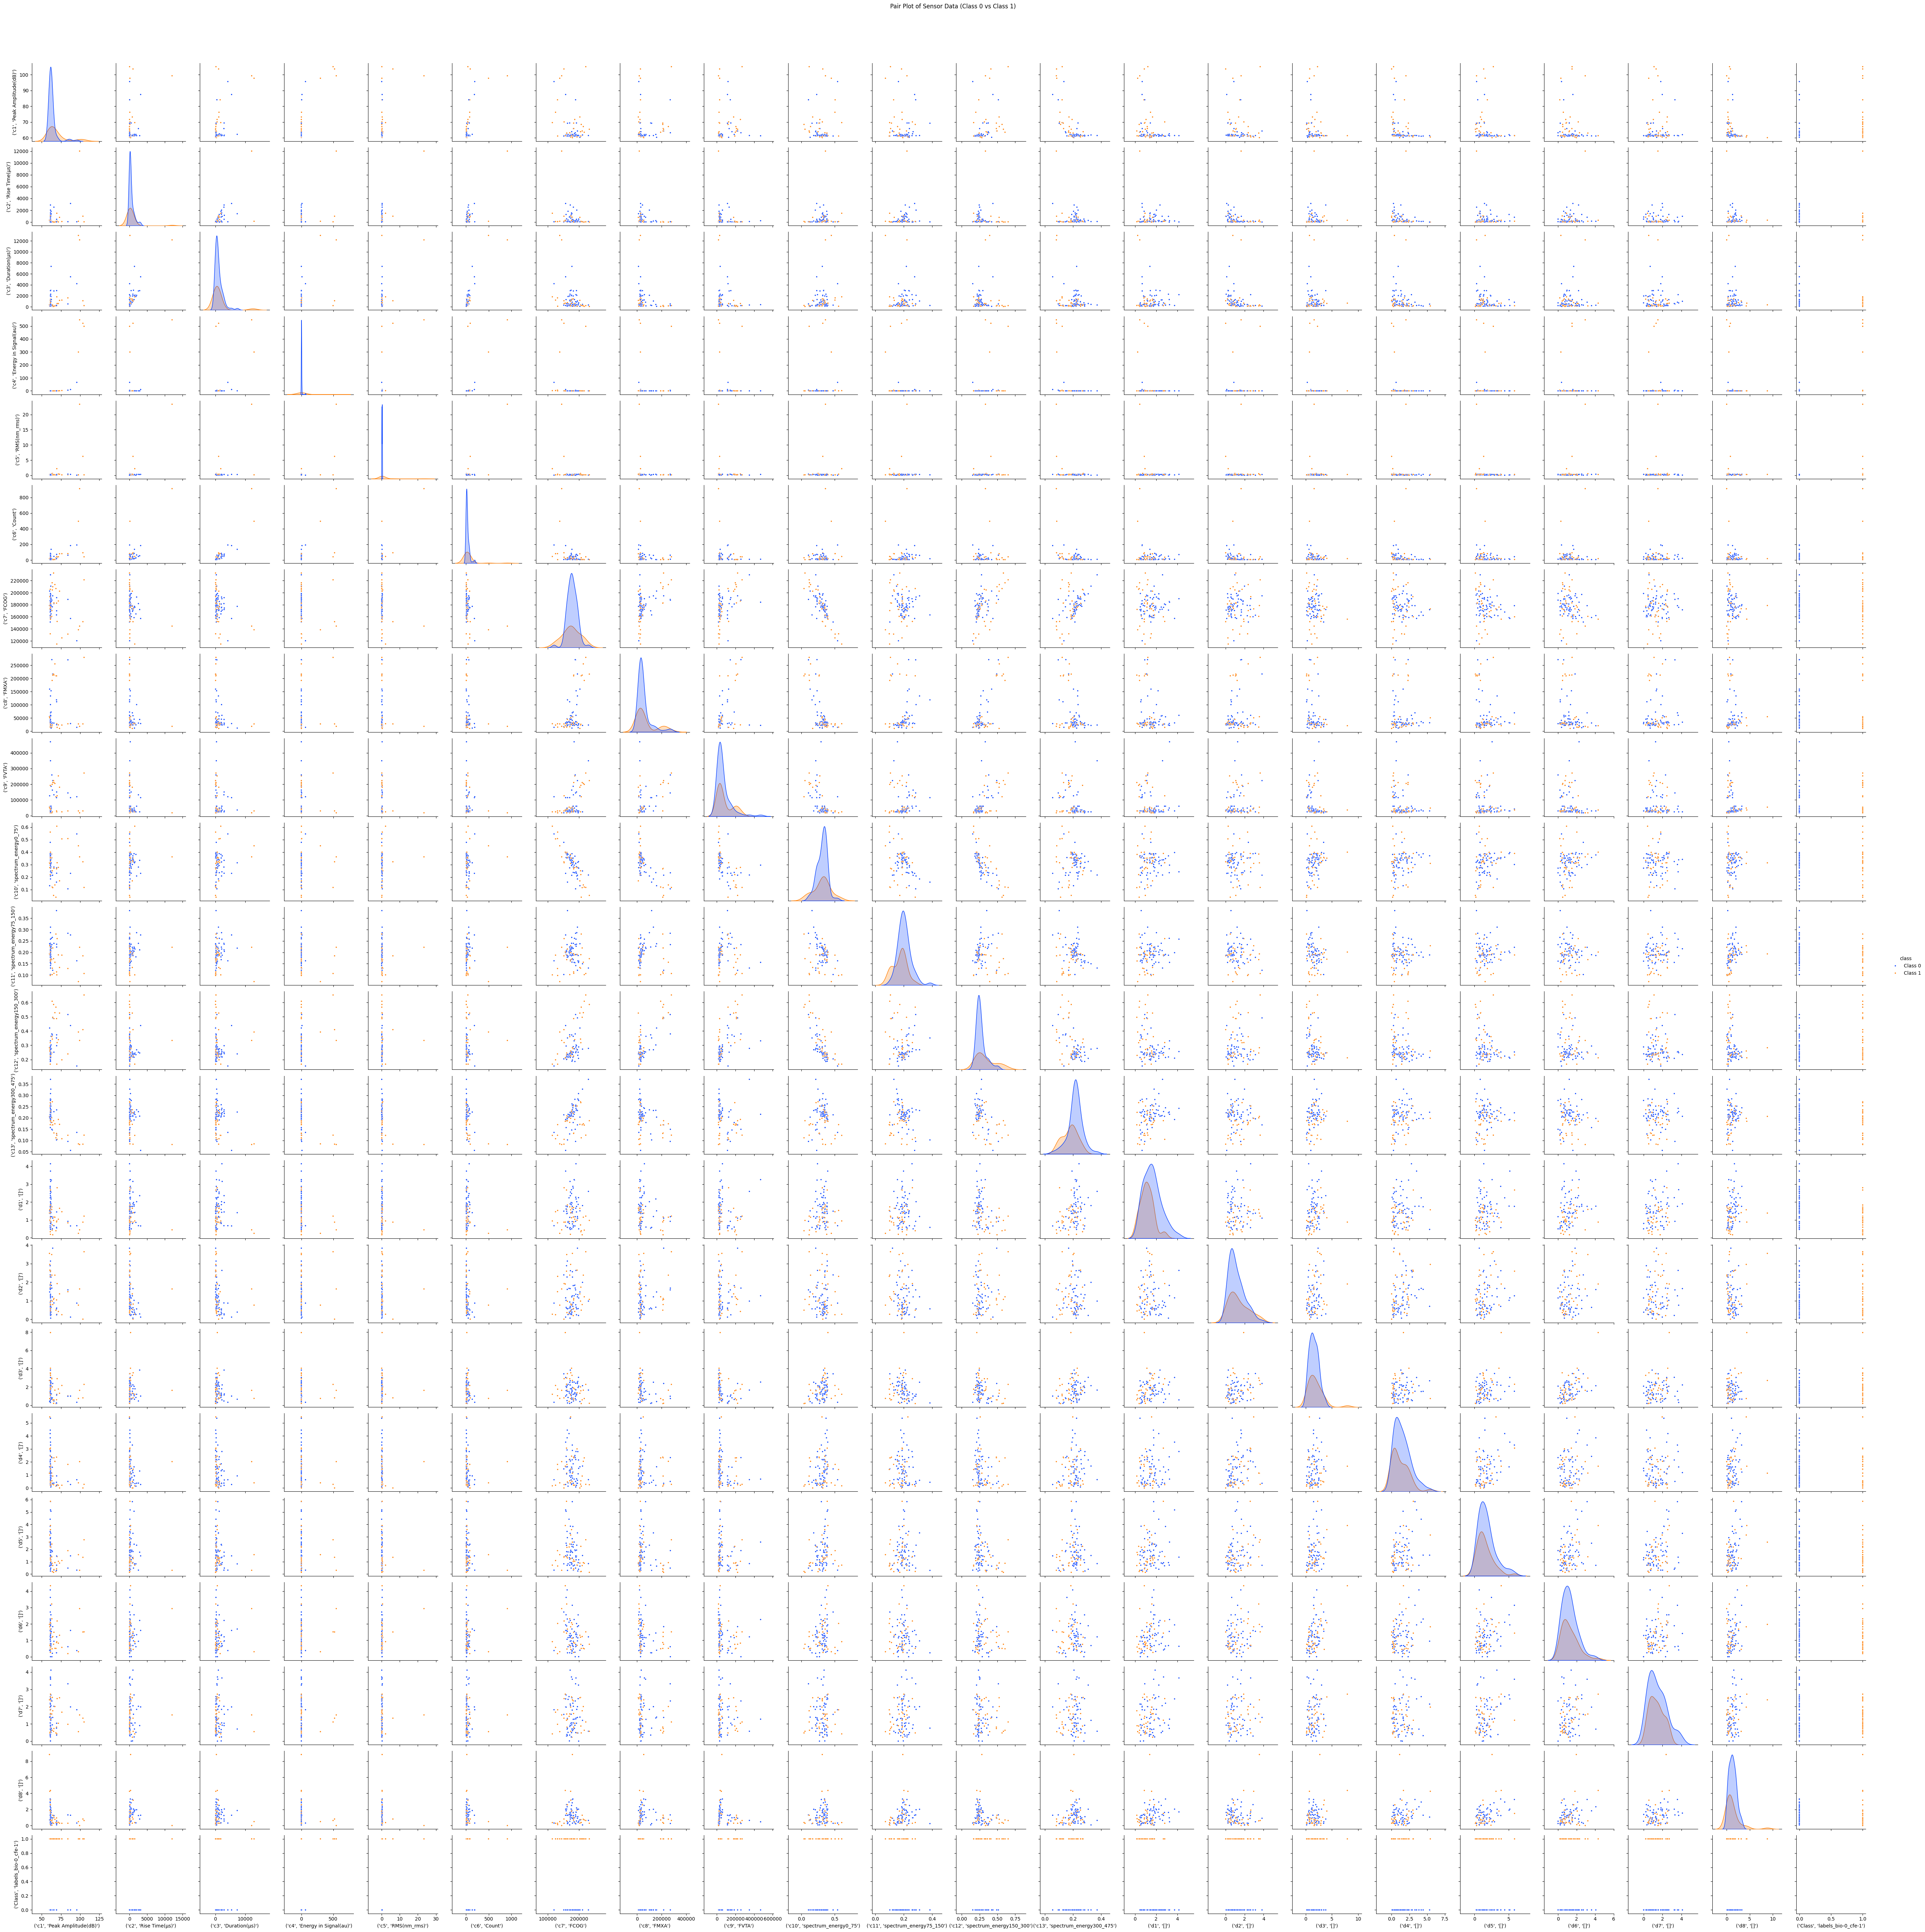

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_excel("CAE1_32_64_20_512_8_10_20.xlsx", header=[0, 1])

# Shuffle the data
df = df.sample(frac=1, random_state=42)

# Take a sample of 100 points
sampled_df = df.sample(n=100, random_state=42)

# Get feature names
feature_names = sampled_df.columns.to_flat_index()

# Create a DataFrame with feature columns
sampled_df = pd.DataFrame(sampled_df.values, columns=feature_names)

# Get the last column as the classification column
classification_column = sampled_df.columns[-1]

# Add a 'class' column for coloring in the pair plot
sampled_df['class'] = sampled_df[classification_column].map({0: 'Class 0', 1: 'Class 1'})

# Create pair plots with hue for class coloring
sns.pairplot(sampled_df, hue='class', palette='bright', markers='.', height=2.5)
plt.suptitle("Pair Plot of Sensor Data (Class 0 vs Class 1)", y=1.02)
plt.show()
